# Report

This report shows the results of a several day web scraping process. The production of renewable energy (solar and wind) along with weather information (global UV radiation and wind speed).

In [9]:
import pandas as pd

filename = 'api_results.h5'
with pd.HDFStore(filename, 'r') as store:
    data_dict = {}
    for key in store.keys():
        data_dict[key] = store[key]

data_dict

{'/day20250316/dwd':                     timestamp  value   unit             variable
 0   2025-03-16 00:00:00+00:00    0.0  J/cm²  Global UV Radiation
 1   2025-03-16 00:10:00+00:00    0.0  J/cm²  Global UV Radiation
 2   2025-03-16 01:20:00+00:00    0.0  J/cm²  Global UV Radiation
 3   2025-03-16 03:20:00+00:00    0.0  J/cm²  Global UV Radiation
 4   2025-03-16 00:20:00+00:00    0.0  J/cm²  Global UV Radiation
 ..                        ...    ...    ...                  ...
 140 2025-03-16 23:20:00+00:00    0.0  J/cm²  Global UV Radiation
 141 2025-03-16 23:30:00+00:00    0.0  J/cm²  Global UV Radiation
 142 2025-03-16 23:40:00+00:00    0.0  J/cm²  Global UV Radiation
 143 2025-03-16 23:50:00+00:00    0.0  J/cm²  Global UV Radiation
 144 2025-03-17 00:00:00+00:00    0.0  J/cm²  Global UV Radiation
 
 [145 rows x 4 columns],
 '/day20250316/entsoe':                     timestamp      variable    value unit
 0   2025-03-16 01:00:00+01:00         Solar      0.0   MW
 1   2025-03-16 01:1

Concatenate the datasets inside the dictionary to one long format dataset. 

In [10]:
combined_df = pd.concat(data_dict.values(), keys = data_dict.keys())
combined_df.head()

timestamp  value   unit  \
/day20250316/dwd 0  2025-03-16 00:00:00+00:00    0.0  J/cm²   
                 1  2025-03-16 00:10:00+00:00    0.0  J/cm²   
                 2  2025-03-16 01:20:00+00:00    0.0  J/cm²   
                 3  2025-03-16 03:20:00+00:00    0.0  J/cm²   
                 4  2025-03-16 00:20:00+00:00    0.0  J/cm²   

                               variable  
/day20250316/dwd 0  Global UV Radiation  
                 1  Global UV Radiation  
                 2  Global UV Radiation  
                 3  Global UV Radiation  
                 4  Global UV Radiation

Transform the column timestamp to datetime format.  Check if each column contains correct values by using describe(). 

In [11]:
combined_df["timestamp"] = pd.to_datetime(combined_df["timestamp"], utc = True)
combined_df.describe(include = 'all')


,timestamp,value,unit,variable
count,457,457.000000,457,457
unique,NaN,NaN,3,5
top,NaN,NaN,MW,Global UV Radiation
freq,NaN,NaN,288,145
mean,2025-03-16 11:53:41.881838080+00:00,4566.787557,NaN,NaN
min,2025-03-16 00:00:00+00:00,0.000000,NaN,NaN
25%,2025-03-16 06:00:00+00:00,0.100000,NaN,NaN
50%,2025-03-16 12:00:00+00:00,1070.000000,NaN,NaN
75%,2025-03-16 18:00:00+00:00,7727.000000,NaN,NaN
max,2025-03-17 00:00:00+00:00,28540.000000,NaN,NaN


Descriptive statistics for each variable showing count, mean, std, min,	25%, 50%, 75% and max of the column value.

In [12]:
combined_df.groupby("variable")["value"].describe(include = 'all')

,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
Global UV Radiation,145.0,4.873103,6.704955,0.000000,0.000000,0.200000,9.900000,29.300000
Solar,96.0,8123.500000,10821.379433,0.000000,0.000000,73.500000,17918.750000,28540.000000
Wind Offshore,96.0,3347.177083,1460.828741,715.000000,2332.250000,3161.500000,4871.250000,5904.000000
Wind Onshore,96.0,10256.614583,2898.219437,5798.000000,8293.500000,9864.000000,11091.500000,16287.000000
Windspeed 10 m,24.0,20.638067,6.775899,10.308831,14.312069,22.771302,26.268476,30.385365


Show the statsitical values using a box-and-whisker plot.

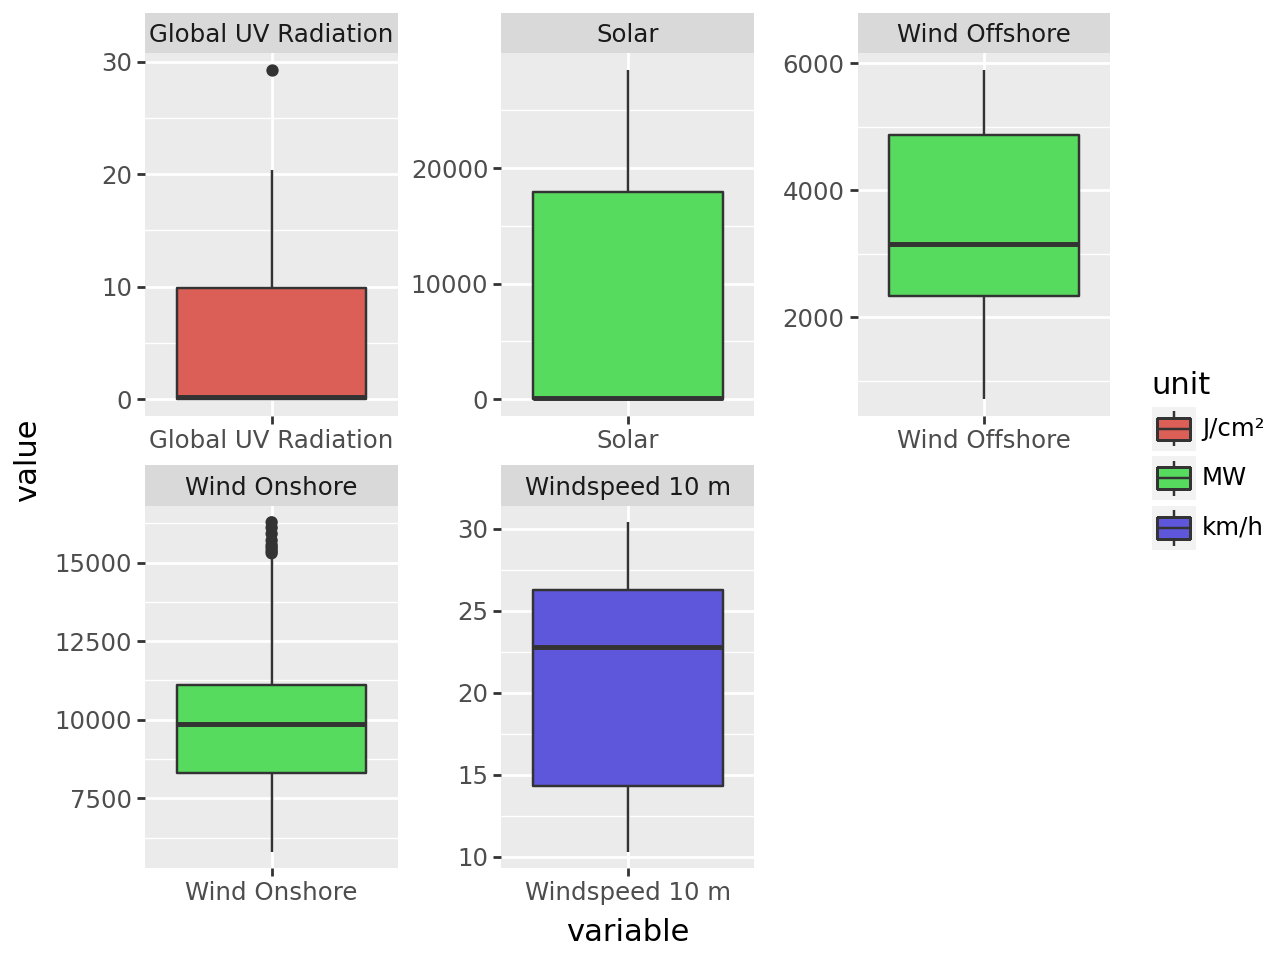

In [15]:
import pandas as pd
from plotnine import (
    ggplot,
    aes,
    geom_boxplot,
    geom_line,
    facet_wrap,
    labs,
    scale_x_datetime,
    element_text,
    theme
)



boxplot = (
    ggplot(combined_df, aes(x='variable', y='value', fill='unit'))
 + geom_boxplot()
 + facet_wrap("variable", scales="free")
)
boxplot 



Show the timeline of each variable using a line plot.

/home/annaz/anaconda3/lib/python3.12/site-packages/mizani/breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


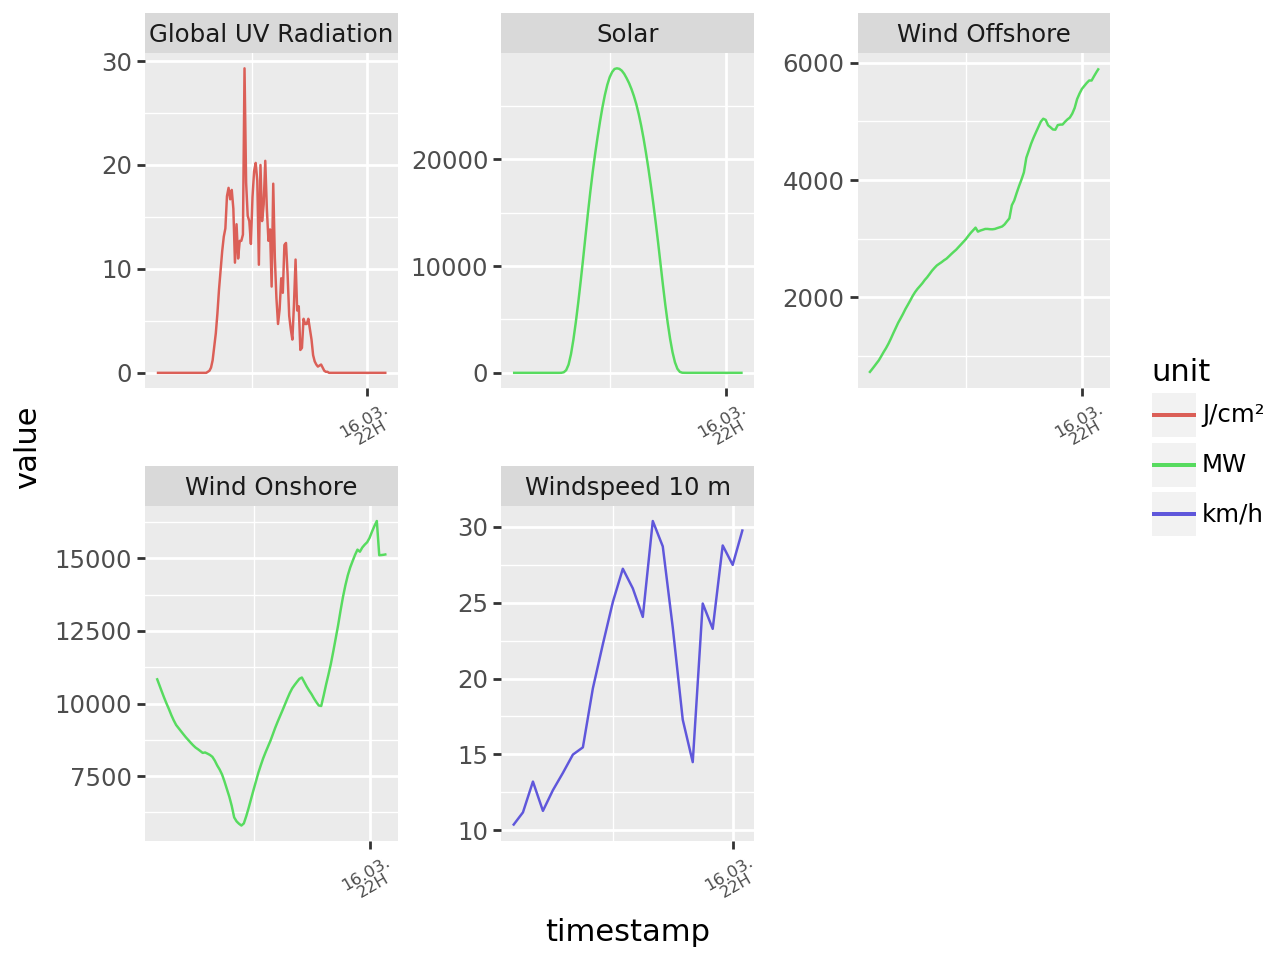

In [16]:

p1 = (
ggplot(combined_df, aes(x="timestamp", y="value", color="unit"))
+ geom_line()
+ scale_x_datetime(date_breaks="24 hours", date_labels="%d.%m.\n%HH")
+ facet_wrap("variable", scales="free")
)
p1 + theme(axis_text_x=element_text(angle=30, size=6))  
